<a href="https://colab.research.google.com/github/Haidarly2/PCVK_Semester_5/blob/main/Pertemuan-12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jobsheet 12 - Face Detection**

- Nama : Haidar Aly
- Kelas : TI-3F
- Absen : 09
- NIM : 2241720258

## **1. Import Library dan Drive**

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Lakukan Face Detection untuk image object lain yang tersedia**

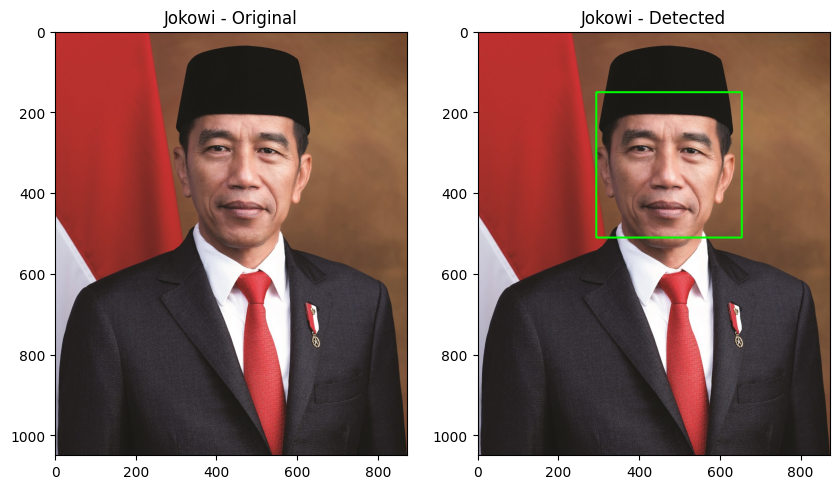

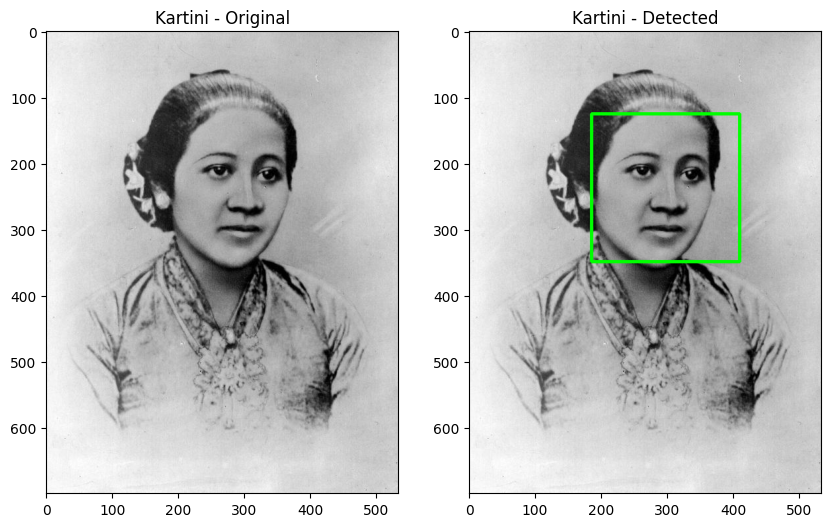

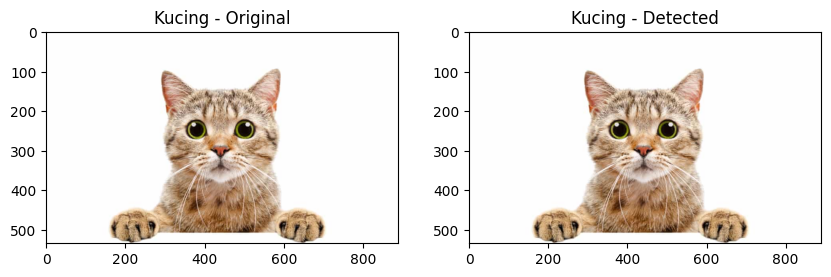

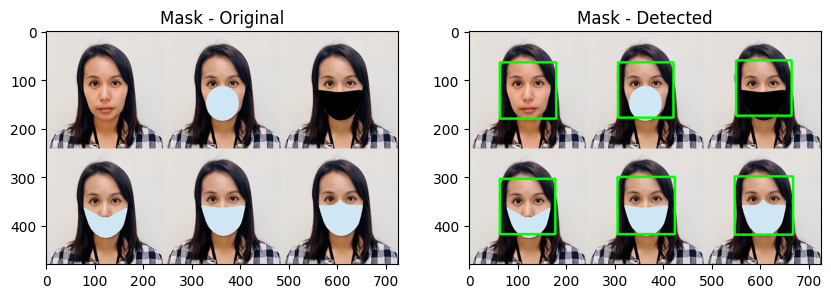

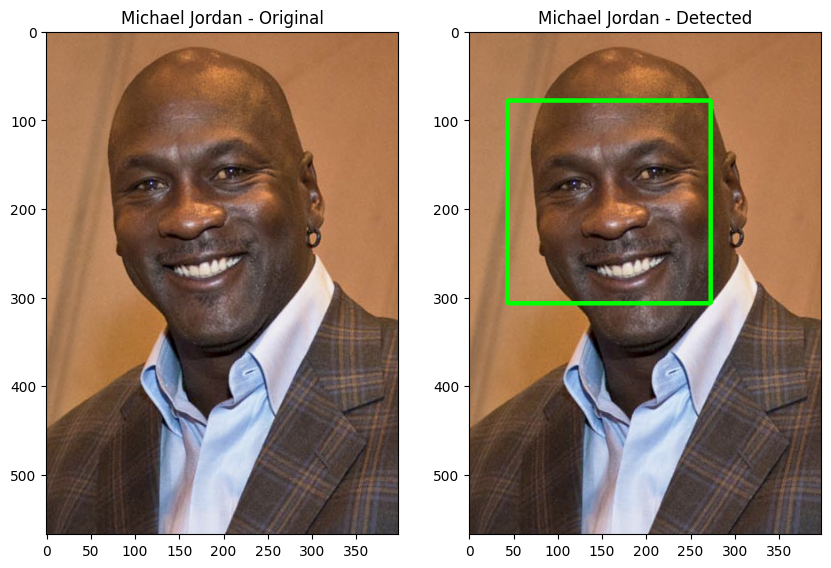

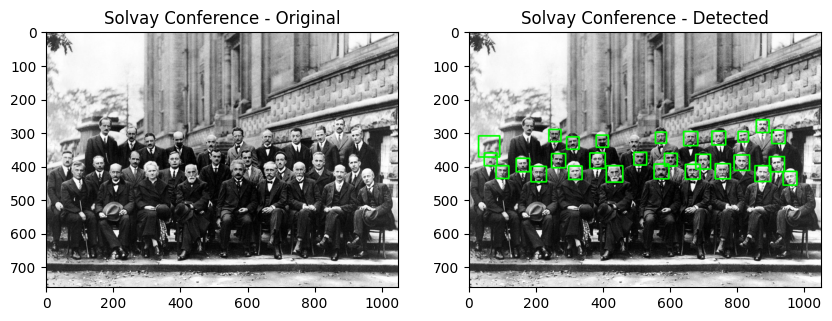

In [ ]:
# Inisialisasi Cascade Classifier untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')

# Fungsi untuk melakukan deteksi wajah dan menampilkan hasilnya
def detect_and_display(image_path, image_title="Image"):
    # Membaca gambar
    image = cv.imread(image_path)

    # Pastikan gambar terbaca
    if image is None:
        print(f"Gambar {image_title} tidak ditemukan.")
        return

    # Mengonversi gambar ke RGB untuk display dan membuat salinan
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    detected_image = image_rgb.copy()

    # Melakukan deteksi wajah
    faces = cascade_wajah.detectMultiScale(detected_image)

    # Menggambar persegi panjang di sekitar wajah yang terdeteksi
    for (x, y, w, h) in faces:
        cv.rectangle(detected_image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Menampilkan gambar asli dan hasil deteksi wajah
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image_rgb)
    plt.title(f"{image_title} - Original")
    plt.subplot(122), plt.imshow(detected_image)
    plt.title(f"{image_title} - Detected")
    plt.show()

# Daftar gambar dan judulnya
images = [
    ('/content/drive/MyDrive/PCVK/Images/jokowi.jpg', 'Jokowi'),
    ('/content/drive/MyDrive/PCVK/Images/kartini.jpg', 'Kartini'),
    ('/content/drive/MyDrive/PCVK/Images/kucing.jpg', 'Kucing'),
    ('/content/drive/MyDrive/PCVK/Images/mask.png', 'Mask'),
    ('/content/drive/MyDrive/PCVK/Images/mjordan.jpg', 'Michael Jordan'),
    ('/content/drive/MyDrive/PCVK/Images/solvayconf.jpg', 'Solvay Conference')
]

# Melakukan deteksi dan menampilkan hasil untuk setiap gambar
for image_path, title in images:
    detect_and_display(image_path, title)

## **3. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya.**

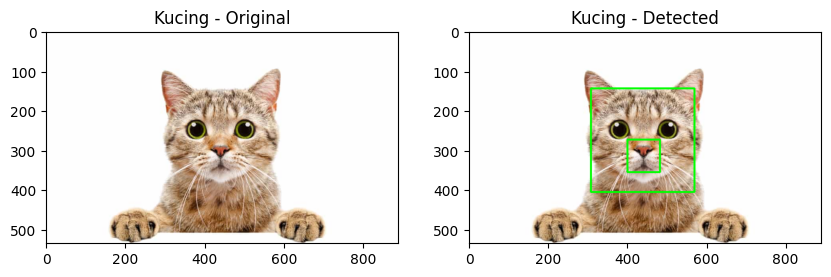

In [ ]:
# Fungsi untuk melakukan deteksi wajah kucing dan menampilkan hasilnya
def detect_cat_face(image_path, classifier_path, image_title="Cat Image"):
    # Inisialisasi classifier untuk deteksi wajah kucing
    cascade_kucing = cv.CascadeClassifier(classifier_path)

    # Membaca gambar
    image = cv.imread(image_path)

    # Memastikan gambar terbaca
    if image is None:
        print(f"Gambar {image_title} tidak ditemukan.")
        return

    # Konversi gambar ke RGB untuk display dan membuat salinan
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    detected_image = image_rgb.copy()

    # Melakukan deteksi wajah kucing
    cat_faces = cascade_kucing.detectMultiScale(detected_image)

    # Menggambar persegi di sekitar wajah kucing yang terdeteksi
    for (x, y, w, h) in cat_faces:
        cv.rectangle(detected_image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Menampilkan gambar asli dan hasil deteksi
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image_rgb)
    plt.title(f"{image_title} - Original")
    plt.subplot(122), plt.imshow(detected_image)
    plt.title(f"{image_title} - Detected")
    plt.show()

# Parameter gambar kucing dan path classifier
image_path = '/content/drive/MyDrive/PCVK/Images/kucing.jpg'
classifier_path = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalcatface.xml'

# Memanggil fungsi untuk melakukan deteksi dan menampilkan hasilnya
detect_cat_face(image_path, classifier_path, "Kucing")

## **4. Cobakan juga untuk eyes detection.**

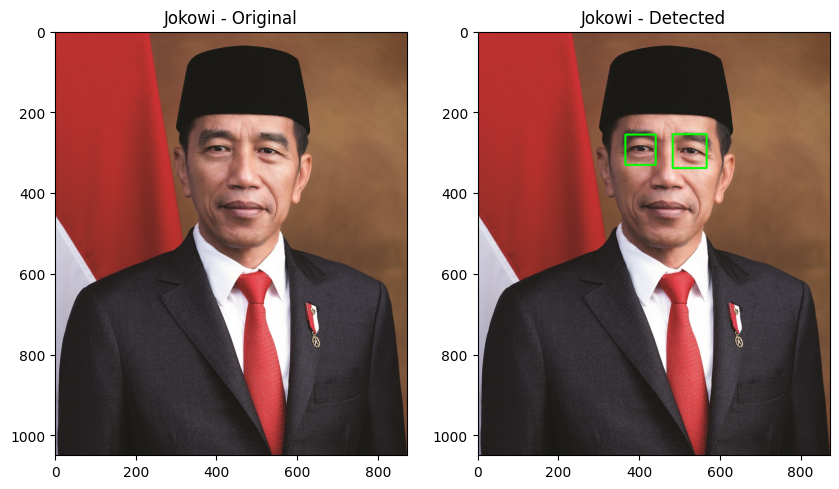

In [ ]:
# Fungsi untuk mendeteksi mata pada gambar dan menampilkan hasilnya
def detect_eyes(image_path, classifier_path, image_title="Detected Eyes"):
    # Inisialisasi classifier untuk deteksi mata
    cascade_mata = cv.CascadeClassifier(classifier_path)

    # Membaca gambar
    image = cv.imread(image_path)

    # Memastikan gambar terbaca
    if image is None:
        print(f"Gambar '{image_title}' tidak ditemukan.")
        return

    # Konversi gambar ke RGB untuk display dan membuat salinan
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    detected_image = image_rgb.copy()

    # Melakukan deteksi mata
    eyes = cascade_mata.detectMultiScale(detected_image)

    # Menggambar persegi di sekitar mata yang terdeteksi
    for (x, y, w, h) in eyes:
        cv.rectangle(detected_image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Menampilkan gambar asli dan hasil deteksi
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image_rgb)
    plt.title(f"{image_title} - Original")
    plt.subplot(122), plt.imshow(detected_image)
    plt.title(f"{image_title} - Detected")
    plt.show()

# Parameter gambar dan path classifier
image_path = '/content/drive/MyDrive/PCVK/Images/jokowi.jpg'
classifier_path = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_eye.xml'

# Memanggil fungsi untuk mendeteksi mata pada gambar
detect_eyes(image_path, classifier_path, "Jokowi")

## **5. Lakukan Face Tracking menggunakan Google Colab.**

In [ ]:
# Fungsi untuk mengonversi objek JavaScript menjadi gambar OpenCV
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img


# Fungsi untuk mengonversi gambar bounding box ke format byte string base64
def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
    return bbox_bytes


# Fungsi untuk memuat model deteksi wajah Haar Cascade
def load_face_cascade(model_path):
    return cv2.CascadeClassifier(model_path)


# Fungsi untuk mengambil foto dan mendeteksi wajah
def take_photo(face_cascade, filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    img = js_to_image(data)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    faces = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2.imwrite(filename, img)
    return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


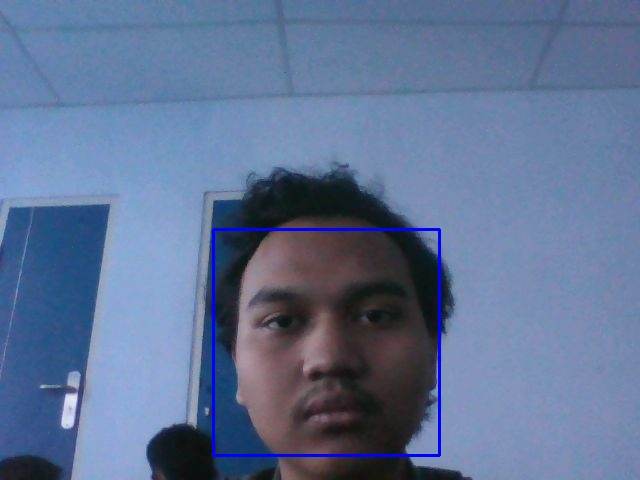

In [ ]:
# Main Script
if __name__ == "__main__":
    # Inisialisasi model Haar Cascade
    face_cascade = load_face_cascade('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_default.xml')

    # Ambil foto dan simpan hasilnya
    try:
        filename = take_photo(face_cascade, 'photo.jpg')
        print(f'Saved to {filename}')
        display(Image(filename))
    except Exception as err:
        print("Error:", str(err))

## **6. Lakukan Blurring pada bagian wajah yang terdeteksi.**

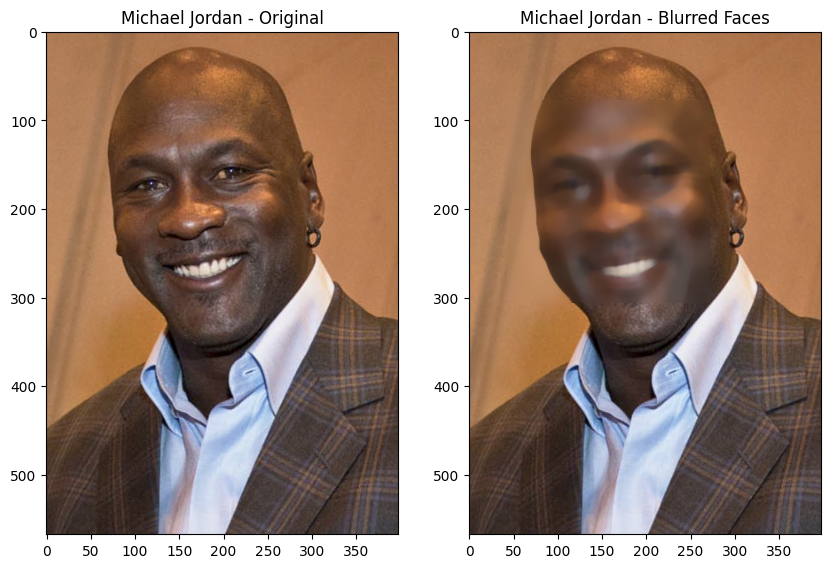

In [ ]:
# Fungsi untuk mendeteksi wajah dan menerapkan efek blur pada area wajah
def detect_and_blur_faces(image_path, classifier_path, title="Face Image"):
    # Inisialisasi classifier untuk deteksi wajah
    cascade_wajah = cv.CascadeClassifier(classifier_path)

    # Membaca gambar
    image = cv.imread(image_path)

    # Memastikan gambar terbaca
    if image is None:
        print(f"Gambar {title} tidak ditemukan.")
        return

    # Konversi gambar ke RGB untuk display dan membuat salinan
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    blurred_image = image_rgb.copy()

    # Melakukan deteksi wajah
    faces = cascade_wajah.detectMultiScale(blurred_image)

    # Mengaplikasikan efek blur pada setiap area wajah yang terdeteksi
    for (x, y, w, h) in faces:
        blurred_image[y:y+h, x:x+w] = cv.medianBlur(blurred_image[y:y+h, x:x+w], 15)

    # Menampilkan gambar asli dan hasil deteksi dengan blur
    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image_rgb)
    plt.title(f"{title} - Original")
    plt.subplot(122), plt.imshow(blurred_image)
    plt.title(f"{title} - Blurred Faces")
    plt.show()

# Parameter gambar dan path classifier
image_path = '/content/drive/MyDrive/PCVK/Images/mjordan.jpg'
classifier_path = '/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml'

# Memanggil fungsi untuk melakukan deteksi dan blur wajah pada gambar
detect_and_blur_faces(image_path, classifier_path, "Michael Jordan")

## **7. Lakukan segmentasi karakter pada KTP**

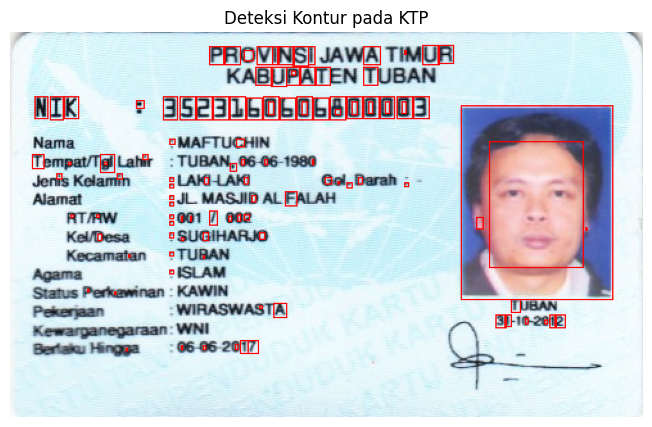

In [ ]:
# Fungsi untuk memuat dan memproses gambar KTP
def load_and_preprocess_image(image_path):
    # Memuat gambar
    image = cv.imread(image_path)

    # Pastikan gambar berhasil dimuat
    if image is None:
        print("Gambar tidak ditemukan.")
        return None, None

    # Menambahkan Gaussian Blur
    blurred = cv.GaussianBlur(image, (5, 5), 0.5)

    # Mengonversi ke grayscale
    gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

    # Melakukan thresholding biner menggunakan Otsu
    _, bw = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Melakukan operasi erosi
    eroded = cv.erode(bw, cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

    return image, eroded

# Fungsi untuk mendeteksi dan menggambar kotak pada kontur yang memenuhi kriteria tertentu
def detect_and_draw_contours(image, binary_image):
    # Ekstraksi kontur dari gambar biner
    contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    # Looping kontur untuk menemukan yang sesuai
    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)
        aspect_ratio = format(w / h, '.2f')

        # Menyeleksi kontur berdasarkan ukuran dan rasio
        if (h >= 4 and w >= 1 and float(aspect_ratio) <= 1) or (h >= 2 and w >= 1 and float(aspect_ratio) <= 1):
            cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Fungsi untuk menampilkan gambar hasil
def display_image_with_contours(image):
    # Konversi ke RGB untuk ditampilkan dengan Matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 5))
    plt.imshow(image_rgb)
    plt.title("Deteksi Kontur pada KTP")
    plt.axis('off')
    plt.show()

# Path gambar KTP
image_path = '/content/drive/MyDrive/PCVK/Images/ktp4.png'

# Memuat dan memproses gambar
ktp_image, eroded_image = load_and_preprocess_image(image_path)

# Memastikan proses berhasil sebelum melanjutkan
if ktp_image is not None and eroded_image is not None:
    # Mendeteksi dan menggambar kontur
    detect_and_draw_contours(ktp_image, eroded_image)

    # Menampilkan hasil
    display_image_with_contours(ktp_image)

## **8. Lakukan cropping pada bagian NIK**

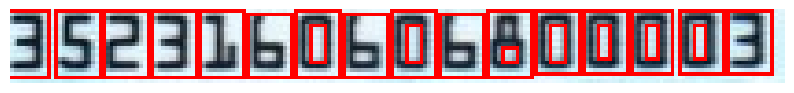

In [ ]:
# Fungsi untuk memuat dan memproses gambar
def preprocess_image(image_path):
    # Memuat gambar
    image = cv.imread(image_path)

    if image is None:
        print("Gambar tidak ditemukan.")
        return None, None

    # Gaussian Blur
    blurred = cv.GaussianBlur(image, (5, 5), 0.5)
    # Konversi ke grayscale
    gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
    # Thresholding Otsu
    _, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    # Operasi erosi
    eroded = cv.erode(binary, cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

    return image, eroded

# Fungsi untuk mendeteksi kontur dan menggambar kotak pada area yang sesuai
def detect_and_draw_contours(image, binary_image):
    # Ekstraksi kontur
    contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)
        aspect_ratio = format(w / h, '.2f')

        # Seleksi kontur berdasarkan ukuran dan rasio
        if (h >= 4 and w >= 1 and float(aspect_ratio) <= 1) or (h >= 2 and w >= 1 and float(aspect_ratio) <= 1):
            cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Fungsi untuk memotong area tertentu dari gambar
def crop_image(image, top_left, bottom_right):
    x1, y1 = top_left
    x2, y2 = bottom_right
    return image[y1:y2, x1:x2]

# Fungsi untuk menampilkan gambar
def display_image(image):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Path gambar
image_path = '/content/drive/MyDrive/PCVK/Images/ktp4.png'

# Langkah 1: Memproses gambar
original_image, eroded_image = preprocess_image(image_path)

# Memastikan gambar berhasil diproses sebelum melanjutkan
if original_image is not None and eroded_image is not None:
    # Langkah 2: Deteksi dan gambar kotak di kontur yang sesuai
    detect_and_draw_contours(original_image, eroded_image)

    # Langkah 3: Memotong bagian tertentu dari gambar
    cropped_image = crop_image(original_image, top_left=(120, 50), bottom_right=(330, 70))

    # Langkah 4: Menampilkan gambar hasil potongan
    display_image(cropped_image)

## **9. Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.**

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt


# Fungsi untuk memuat dan menyiapkan data MNIST
def load_and_prepare_mnist_data(num_samples_per_class, digits_to_extract):
    (X_train, y_train), _ = tf.keras.datasets.mnist.load_data()

    def extract_samples(X, y, digits, num_samples):
        samples = []
        for digit in digits:
            digit_indices = np.where(y == digit)[0]
            selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
            samples.extend([(X[i], digit) for i in selected_indices])
        return samples

    training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)
    np.random.shuffle(training_data)
    X, Y = zip(*training_data)
    X = np.array(X).reshape(-1, 28, 28, 1)
    Y = to_categorical(Y, num_classes=10)
    return X, Y


# Fungsi untuk menyimpan dan memuat data dengan pickle
def save_data_pickle(X, Y, X_path, Y_path):
    with open(X_path, "wb") as f:
        pickle.dump(X, f)
    with open(Y_path, "wb") as f:
        pickle.dump(Y, f)


def load_data_pickle(X_path, Y_path):
    with open(X_path, "rb") as f:
        X = pickle.load(f)
    with open(Y_path, "rb") as f:
        Y = pickle.load(f)
    return X, Y


# Fungsi untuk membuat model CNN
def create_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
    conv_layer = Conv2D(16, (5, 5), activation='relu')(conv_layer)
    conv_layer = MaxPooling2D((2, 2))(conv_layer)
    conv_layer = Conv2D(32, (3, 3), activation='relu')(conv_layer)
    conv_layer = Conv2D(32, (3, 3), activation='relu')(conv_layer)
    conv_layer = MaxPooling2D((2, 2))(conv_layer)
    conv_layer = Conv2D(64, (3, 3), activation='relu')(conv_layer)
    flaten = Flatten()(conv_layer)
    fc_layer = Dense(256, activation='relu')(flaten)
    fc_layer = Dense(64, activation='relu')(fc_layer)
    outputs = Dense(10, activation='softmax')(fc_layer)

    model = Model(inputs=inputs, outputs=outputs)
    return model


# Fungsi untuk melatih dan menyimpan model
def train_and_save_model(model, X, Y, model_path, epochs=20, learning_rate=0.0001):
    adam = Adam(learning_rate=learning_rate)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X / 255.0, Y, epochs=epochs, verbose=1)
    model.save(model_path)


# Fungsi untuk memuat model dan mengevaluasi
def evaluate_model(model_path, X, Y):
    model = tf.keras.models.load_model(model_path)
    predictions = model.predict(X / 255.0)
    accuracy = model.evaluate(X / 255.0, Y)[1]
    return model, predictions, accuracy


# Fungsi untuk menampilkan hasil uji dengan gambar
def display_test_results(X, Y, predictions, num_results_to_display=30):
    fig, axes = plt.subplots(5, 6, figsize=(12, 10))
    axes = axes.flatten()

    for i in range(num_results_to_display):
        predicted_label = np.argmax(predictions[i])
        actual_label = np.argmax(Y[i])
        img = X[i].reshape((28, 28))

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
        axes[i].axis('off')

    for i in range(num_results_to_display, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

Epoch 1/20
32/32 [==============================] - 2s 8ms/step - loss: 2.2879 - accuracy: 0.1340
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: 2.2023 - accuracy: 0.3940
Epoch 3/20
32/32 [==============================] - 0s 7ms/step - loss: 1.8717 - accuracy: 0.6110
Epoch 4/20
32/32 [==============================] - 0s 7ms/step - loss: 1.1811 - accuracy: 0.7360
Epoch 5/20
32/32 [==============================] - 0s 7ms/step - loss: 0.7210 - accuracy: 0.7980
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: 0.5492 - accuracy: 0.8340
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: 0.4600 - accuracy: 0.8670
Epoch 8/20
32/32 [==============================] - 0s 7ms/step - loss: 0.4010 - accuracy: 0.8860
Epoch 9/20
32/32 [==============================] - 0s 7ms/step - loss: 0.3651 - accuracy: 0.8980
Epoch 10/20
32/32 [==============================] - 0s 7ms/step - loss: 0.3198 - accuracy: 0.9150
Epoch 11/20
32/32 [

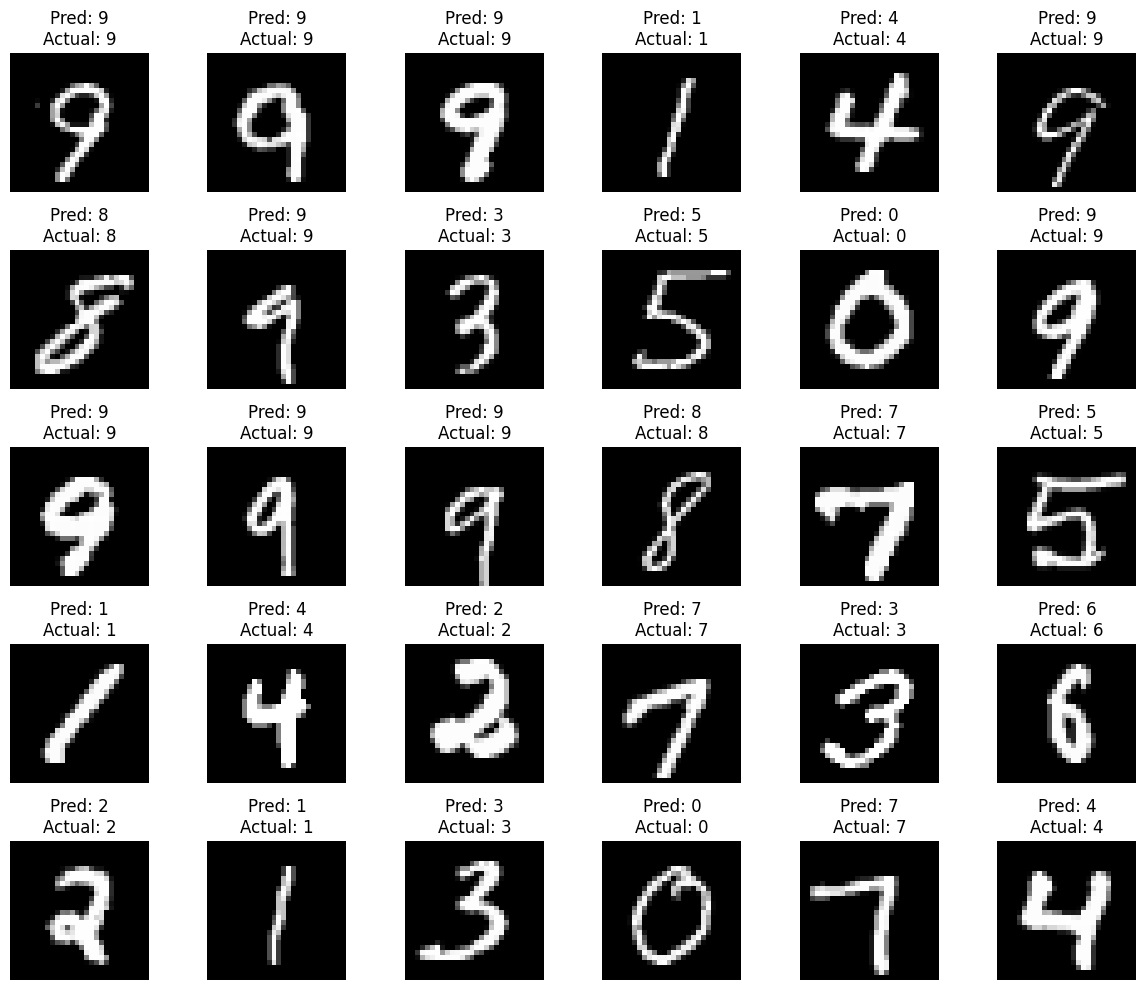

In [ ]:
# Main script
if __name__ == "__main__":
    # Parameters
    num_samples_per_class = 100
    digits_to_extract = list(range(10))
    model_path = "anpr.keras"
    X_path = "X_mnist.pickle"
    Y_path = "Y_mnist.pickle"

    # Load and prepare data
    X, Y = load_and_prepare_mnist_data(num_samples_per_class, digits_to_extract)

    # Save data to pickle
    save_data_pickle(X, Y, X_path, Y_path)

    # Load data from pickle
    X, Y = load_data_pickle(X_path, Y_path)

    # Create and train the model
    cnn_model = create_cnn_model(input_shape=(28, 28, 1))
    train_and_save_model(cnn_model, X, Y, model_path)

    # Evaluate the model
    model, predictions, accuracy = evaluate_model(model_path, X, Y)
    print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

    # Display test results
    display_test_results(X, Y, predictions, num_results_to_display=30)

## **Tugas**

Detected: 22


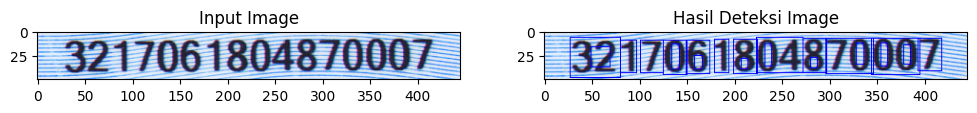

1/1 [==============================] - 0s 23ms/step


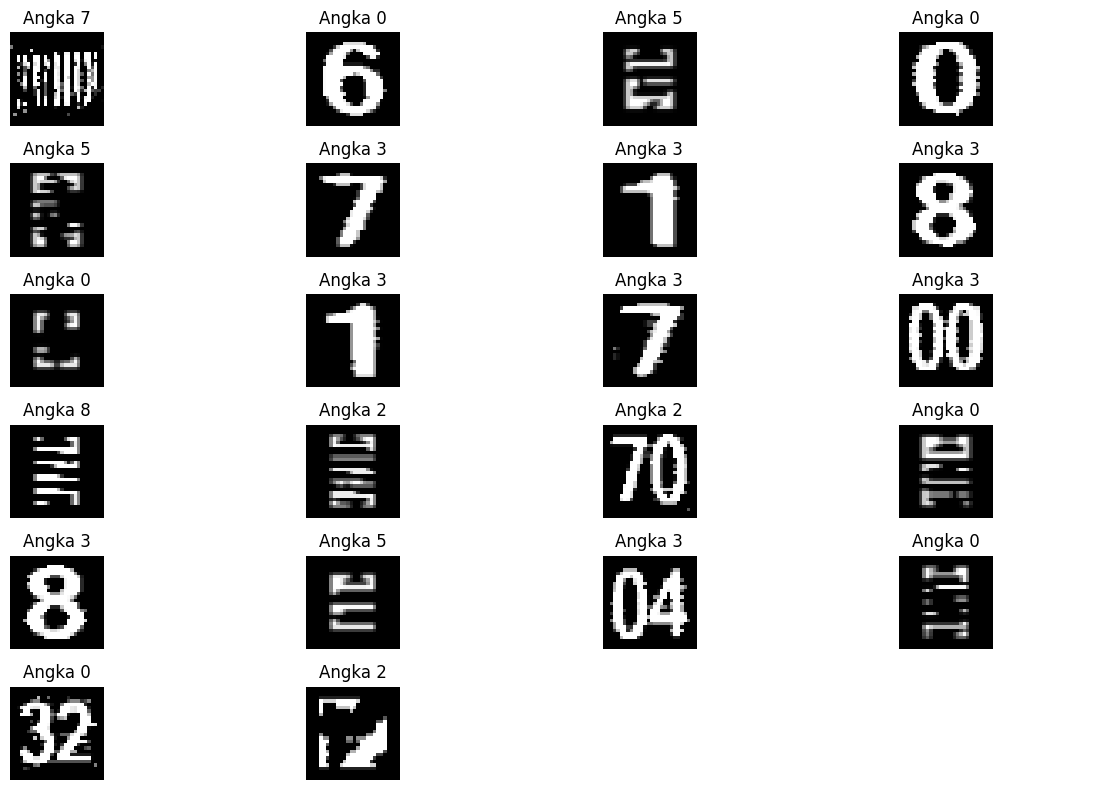

In [ ]:
import cv2
import numpy as np
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Pastikan Anda telah memuat model sebelum menjalankan prediksi
# Ganti 'your_model_path.h5' dengan path model Anda
model = load_model('anpr.keras')

# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp2.png')

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

# Convert to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Apply contrast enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)

# Apply binary thresholding with OTSU
_, bw = cv2.threshold(enhanced_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply morphological operations for noise reduction
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))

# Crop the region of interest (ROI)
cropped_img = ktp[130:180, 240:685]

# Deteksi kontur pada cropped image
cropped_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(cropped_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
detected = cropped_img.copy()
nums = []

# Filter kontur dan ekstraksi ROI
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if (h >= 40 and w >= 10 and aspect_ratio <= 1) or \
       (h >= 8 and w >= 8 and aspect_ratio <= 10) or \
       (h >= 10 and w >= 7 and aspect_ratio <= 8):
        cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)
        num = cropped_gray[y:y + h, x:x + w]
        nums.append(num)

print(f'Detected: {len(nums)}')

# Plot hasil deteksi awal
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)), plt.title('Input Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB)), plt.title('Hasil Deteksi Image')
plt.show()

# PCA dan prediksi angka
num_count = len(nums)
cols = 4  # Tetapkan jumlah kolom
rows = (num_count + cols - 1) // cols  # Hitung jumlah baris berdasarkan jumlah elemen

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
axes = axes.flatten()

for i, num in enumerate(nums):
    # Preprocessing angka untuk model
    ret, thresh = cv2.threshold(num, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    top, bottom, left, right = 4, 4, 4, 4
    num = cv2.copyMakeBorder(thresh, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    num = cv2.resize(num, (28, 28))
    num = num / 255.0  # Normalisasi piksel antara 0 dan 1

    # Model prediksi
    num_reshaped = num.reshape(1, 28, 28, 1)  # Pastikan input sesuai format model
    pred = model.predict(num_reshaped)
    pred = np.argmax(pred)

    # Plot angka hasil dan prediksi
    axes[i].imshow(num, cmap='gray')
    axes[i].set_title(f'Angka {pred}')
    axes[i].axis('off')

# Sembunyikan subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()